# Bias-Variance Tradeoff: Classification (11 points)

In our lecture, we talked the bias-variance tradeoff in a regression case, where we found that a regression model is the one that can find a tradeoff between the **bias** between the expected model and the Bayes predictor and the **variance** between the expected model and the model trained on one specific training set. 

In this assignment, we aim to study a similar tradeoff in a classification case. Specifically, we will use the SVM model with a RBF kernel and study how the model behaves with different $\gamma$'s. 

The high-level idea of this assignment is the exactly the same as the one discussed in our lecture. Please review the **bias-variance tradeoff** in lecture 03 for more details. 

**Submission instruction**

- Rename this file with your computingID, as [ComputingID]-hw02.ipynb
- Please keep all the outputs in this notebook for grading

In [1]:
# Necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## 1. Data Generation (3 points)

In the `generate_data()` function, please implement the data generation process with the following requirements. 

For a given number of sample specified by `n_sample`, the examples are generated from the Gaussian distribution with specific mean and variance. 

- 50% examples are generated from the Gaussian distribution with mean as $[0,0]$ and variance as $[[1,0],[0,1]]$, and labeled as POSITIVE
- 25% examples are generated from the Gaussian distribution with mean as $[2,2]$ and variance as $[[2,0],[0,2]]$, and labeled as NEGATIVE
- 25% examples are generated from the Gaussian distribution with mean as $[2,-1]$ and variance as $[[0.5,0],[0,0.5]]$, and labeled as NEGATIVE

For each component, you can use the function [multivariate_normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) from `numpy` for sampling. 

(200, 2)


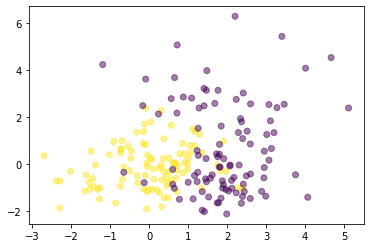

In [2]:
# Data generation

def generate_data(n_sample):
    # ------------------------------------
    # TODO: implement the data generation process
    # 
    # ------------------------------------
    
    mean = [0, 0]
    cov = [[1, 0], [0, 1]]  
    X= np.random.multivariate_normal(mean, cov, int(n_sample*0.5))
    mean2 = [2,2]
    cov2 = [[2, 0], [0, 2]]  
    X1 = np.random.multivariate_normal(mean2, cov2, int(n_sample*0.25))
    X = np.concatenate((X,X1),axis=0)
    mean3 = [2,-1]
    cov3 = [[0.5, 0], [0, 0.5]]
    X1 = np.random.multivariate_normal(mean3, cov3, int(n_sample*0.25))
    X = np.concatenate((X,X1),axis=0)
    y = np.ones(int(n_sample*0.5))
    y = np.concatenate((y,np.zeros(int(n_sample*0.5))))
    return X, y
    
# Run the following code to test your implementation
X_beta, y_beta = generate_data(n_sample=200)
print(X_beta.shape)
plt.scatter(X_beta[:, 0], X_beta[:, 1], c=y_beta, alpha=0.5)

### 1.1 Generate Test Data

Computing the true error in this case is much more compliciated than the one-dimensional case as illustrated in our le ctures. Therefore, we are going to use an alternative method for approximating the true error: the following code will generate a large set of examples (3K) from the data generation function that you implemented before. We are going to use the same test data for all the following evaluation. 

(2000, 2)


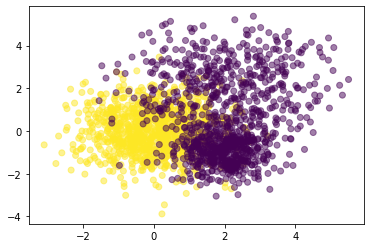

In [3]:
# Plot the test set, which can be used to approximate the ground-truth distribution
X_test, y_test = generate_data(n_sample=2000)
print(X_test.shape)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)

## 2. Training SVMs with Generated Data (3 points)

In this section, we will generate training data from the ground-truth data distribution, and train a SVM classifier with each specific training set.

In the `train()` function, for each iteration $n$, please implement the components:

1. Generate training data
2. Training a model
3. Test it on (X_test, y_test)
4. Attach the trained classifier to the list clfs, and the accuracy number to the list accs

As you can see, the function will also calcuate the mean of the variance of prediction accuracies, and return the list of classifiers `clfs` for further use. 

In [4]:
# 

def train(X_test, y_test, N=10, gamma=1.0):
    clfs, accs = [], []
    i = 0
    for n in tqdm (range (N), desc="Training models ..."):
        # -----------------------------------
        # TODO: for each iteration n
        acc = []
        clf = SVC(gamma=gamma)
        X_train, y_train = generate_data(n_sample=200)
        clf.fit(X_train, y_train)
        clfs = np.append(clfs,clf)
        acc = clf.predict(X_test)
        acc = (1 - abs(acc - y_test))
        acc = sum(acc)/2000
        print(acc)
        accs = np.append(accs,acc)
        #np.colum_stack()
        # ------------------------------------
    print("The mean accuracy: {} and its variance: {}".format(np.mean(accs), np.var(accs)))
    return clfs

# Run the following line to test the function before moving forward
clfs = train(X_test, y_test, N=10, gamma=0.1)

Training models ...: 100%|██████████| 10/10 [00:00<00:00, 52.10it/s]

0.8745
0.8625
0.8675
0.8705
0.8625
0.8645
0.877
0.8735
0.8715
0.8705
The mean accuracy: 0.8694500000000002 and its variance: 2.3022499999999958e-05


### 2.1 The Bayes predictor

Similar to the regression case, with the ground-truth data distribution, we can calculate the decision boundary given by the Bayes predictor. Although in this case, finding the analystical solution is compliciated, we are going to a numeric method for finding the decision boundary. 

In [6]:
# This code is ready to use

from scipy.stats import multivariate_normal

class Bayes_Predictor(object):
    def __init__(self):
        pass

    def predict(self, x):
        '''
        x - inputs
        '''
        pos = multivariate_normal([0,0], [[1,0],[0,1]])
        neg1 = multivariate_normal([2,2], [[2,0],[0,2]])
        neg2 = multivariate_normal([2,-1], [[0.5,0],[0,0.5]])
        pos_val = pos.pdf(x)
        neg1_val = neg1.pdf(x)
        neg2_val = neg2.pdf(x)
        labels = np.all([np.greater(pos_val, neg1_val), np.greater(pos_val, neg2_val)], axis=0)
        return labels


In [7]:
def train_Bayes(X_test, y_test, N=20, gamma=1.0):
    clfs, accs = [], []
    i = 0
    for n in tqdm (range (N), desc="Training models ..."):
        # -----------------------------------
        # TODO: for each iteration n
        acc = []
        clf = Bayes_Predictor();
        clfs = np.append(clfs,clf)
        acc = clf.predict(X_test)
        acc = (1 - abs(acc - y_test))
        acc = sum(acc)/2000
        accs = np.append(accs,acc)
        #np.colum_stack()
        # ------------------------------------
    print("The mean accuracy: {} and its variance: {}".format(np.mean(accs), np.var(accs)))
    return clfs

# Run the following line to test the function before moving forward
clfs_Bayes = train_Bayes(X_test, y_test, N=10, gamma=0.1)

Training models ...: 100%|██████████| 10/10 [00:00<00:00, 337.29it/s]

The mean accuracy: 0.868 and its variance: 0.0


## 3. Plot Decision Boundaries

This is a function that is ready to use for drawing decision boundaries. It is **ready** to use. 

Note that, the first argument of `plot_decision_boundary` is a list of classification model. If you only have one classification model, then you need to put it in a list.

[Reference](https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot)

In [8]:
# This code is ready to use

def plot_decision_boundary(clfs, X_test, color='lightgray'):
    '''
    clfs - a list of classification models
    X_test - the inputs of the TEST data 
             (it requires the inputs only for determining the range of the input space)
    color - the color of the decision boundary
    '''
    h = .02  # step size in the mesh
    x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    for n in tqdm(range(len(clfs)), desc="Plot decision boundaries ..."):
        clf = clfs[n]
        Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        plt.contour(xx1, xx2, Z, colors=color)


## 4. Put All Together (5 points)

The following code will put all functions together to draw 

### 4.1 Training SVMs with $\gamma=0.01$ (2 points)

With $\gamma=0.01$, we are going to visualize how the decision boundaries look like with different copies of training data. 

Please implement the following components with the functions that you defined before

- Use `train()` to train 10 different SVM models
- Plot the decision boundary of each SVM using `plot_decision_boundary`
- Use the Bayes predictor defined in the `Bayes_Predictor` class and draw its decision boundary using `plot_decision_boundary`

Please **keep all outputs** for grading.

Training models ...:  80%|████████  | 8/10 [00:00<00:00, 37.31it/s]

0.8595
0.8595
0.858
0.859
0.862
0.86
0.8615
0.8585


Plot decision boundaries ...:   0%|          | 0/10 [00:00<?, ?it/s]

0.86
0.8605
The mean accuracy: 0.8598500000000001 and its variance: 1.4025000000000052e-06


Plot decision boundaries ...: 100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


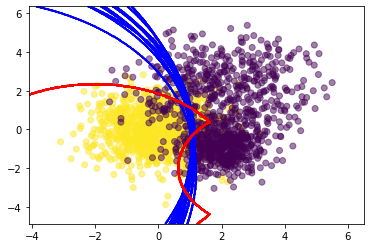

In [9]:
# Gamma: 0.01

# The hyper-parameter of the RBF kernel
gamma=0.01
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)
clfs = train(X_test, y_test, N=10, gamma=0.01)
# TODO: Training a list of SVM models and plot their decision boundaries
# 
plot_decision_boundary(clfs, X_test, color='blue')

# TODO: Plot the decision boundary of the Bayes predictor
# 
plot_decision_boundary(clfs_Bayes, X_test, color='red')


### 4.2 Training models with other $\gamma$ (1 point)

Now, let's train the models with two other $\gamma$'s using the following two code blocks

- $\gamma = 1.0$
- $\gamma = 10.0$

You can copy and paste the code from the previous block. And keep **all outputs** for grading. 

Training models ...:  90%|█████████ | 9/10 [00:00<00:00, 42.29it/s]

0.8745
0.8705
0.865
0.8625
0.874
0.8635
0.8655
0.8685
0.861


Plot decision boundaries ...:   0%|          | 0/10 [00:00<?, ?it/s]

0.8595
The mean accuracy: 0.86645 and its variance: 2.477250000000004e-05


Plot decision boundaries ...: 100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


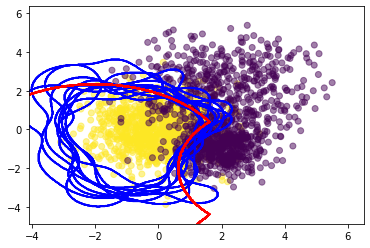

In [10]:
# Gamma: 1.0
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)
clfs_1 = train(X_test, y_test, N=10, gamma=1)
plot_decision_boundary(clfs_1, X_test, color='blue')
plot_decision_boundary(clfs_Bayes, X_test, color='red')

# TODO: Repeat the experiment with gamma=1.0

Training models ...:  60%|██████    | 6/10 [00:00<00:00, 26.99it/s]

0.8275
0.8215
0.843
0.819
0.833
0.819


Plot decision boundaries ...:   0%|          | 0/10 [00:00<?, ?it/s]

0.8235
0.8185
0.8355
0.8285
The mean accuracy: 0.8268999999999999 and its variance: 6.0940000000000037e-05


Plot decision boundaries ...: 100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


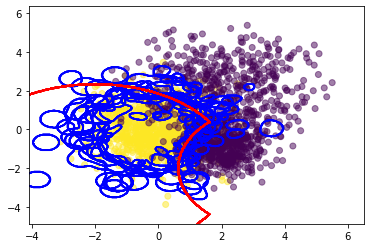

In [11]:
# Gamma: 10.0
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)
clfs_10 = train(X_test, y_test, N=10, gamma=10)
plot_decision_boundary(clfs_10, X_test, color='blue')
plot_decision_boundary(clfs_Bayes, X_test, color='red')


# TODO: Repeat the experiment with gamma=10.0

### 4.3 Conclusion (2 points)

What conclusion you can get from the models with different $\gamma$'s. Please answer the question from the perspectives of 

- the mean prediction accuracy
- the variance of prediction accuracy
- the pattern of the decision boundaries.

TODO: *leave your answer here*

When $\gamma$ = 1 the SVM models have the largest average prediction accuracy
and when $\gamma$ = 0.01 the SVM models have the lowest average prediction accuracy.

When $\gamma$ = 10 predction's variance is larger than the variance when $\gamma$ = 1 and $\gamma$ = 0.01.
To sum up, when $\gamma$ = 0.01 the performance of SVM models are the worest. Not only in the prediction accuracy, but also in the stability of the model (variance).In contrast, when $\gamma$ = 1, SVM models were more stable and better able to reflect the ground-truth distribution when we used different data sets in the real distribution

From the pattern of the decision boundaries, we can find that the models are overfitting when  $\gamma$ = 10 
You can see that the SVM boundary contains many circles. These circles are the result of overfitting during training. It only divide the area near the training set.
When  $\gamma$ = 0.01, you can find the pattern of underfitting. The boundary does not accurately reflect the distribution of different classification data compare with the bayes boundary. The decision boundaries gives only a very general answer.